# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [ ]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [ ]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)# fa il fitting ossia addestra il classificatore sui dati

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [ ]:
print(clf.predict([[0, 1, 1]]))

[0]


In [ ]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


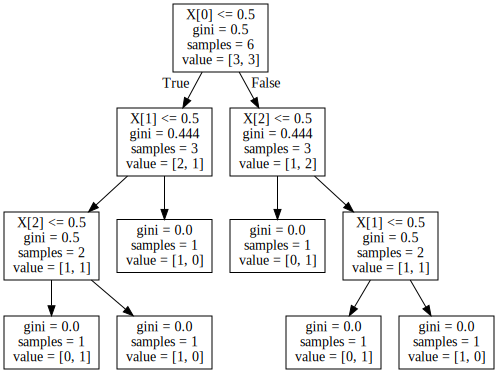

In [ ]:
#Dot è un linguaggio di descrizione dei grafi 

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris() #qui viene inserita la matrice contenente le features e l'etichetta associata

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [ ]:
#random state deve essere impostato ad un intero per avere un comportamento deterministico
#in class weight abbiamo l'indice della classe e il peso associato (Costo) 
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [ ]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(1)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10] #dal primo al decimo dalla fine
indices_test=indices[-10:] #dal decimo elemento dalla fine alla fine

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training] # the vector with the targhet values of matrix elements
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [ ]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [ ]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[0 1 1 1 1 1 2 1 2 0]
True classes:
[0 2 1 2 1 2 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [ ]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 25: 
Predicted: setosa	 True: setosa

Instance # 134: 
Predicted: versicolor	 True: virginica

Instance # 71: 
Predicted: versicolor	 True: versicolor

Instance # 129: 
Predicted: versicolor	 True: virginica

Instance # 79: 
Predicted: versicolor	 True: versicolor

Instance # 133: 
Predicted: versicolor	 True: virginica

Instance # 137: 
Predicted: virginica	 True: virginica

Instance # 72: 
Predicted: versicolor	 True: versicolor

Instance # 140: 
Predicted: virginica	 True: virginica

Instance # 37: 
Predicted: setosa	 True: setosa



# Stampo degli esempi per vedere come sono fatti

In [ ]:
#per ogni esempio nel test set stampo il nome delle features e il loro valore
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 25 134  71 129  79 133 137  72 140  37]: 
sepal length (cm)=5.0, sepal width (cm)=3.0, petal length (cm)=1.6, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 25 134  71 129  79 133 137  72 140  37]: 
sepal length (cm)=6.1, sepal width (cm)=2.6, petal length (cm)=5.6, petal width (cm)=1.4
Predicted: versicolor	 True: virginica

Instance # [ 25 134  71 129  79 133 137  72 140  37]: 
sepal length (cm)=6.1, sepal width (cm)=2.8, petal length (cm)=4.0, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 25 134  71 129  79 133 137  72 140  37]: 
sepal length (cm)=7.2, sepal width (cm)=3.0, petal length (cm)=5.8, petal width (cm)=1.6
Predicted: versicolor	 True: virginica

Instance # [ 25 134  71 129  79 133 137  72 140  37]: 
sepal length (cm)=5.7, sepal width (cm)=2.6, petal length (cm)=3.5, petal width (cm)=1.0
Predicted: versicolor	 True: versicolor

Instance # [ 25 134  71 129  79 133 137  72 140  37]: 
sepal length (cm)=6.3, sepal w

# Obtain model performance results: arrivo alle conclusioni sulle performance del classificatore

In [ ]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score #F1 score è la media armonica tra recall e precision
acc_score = accuracy_score(iris_y_test, predicted_y_test) #percentage of accurancy predictions
print("Accuracy score: "+ str(acc_score))
# macro average fa media delle performance tra le due classi e non ha bias verso nessuna xk le tratta ugualmente
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.7
F1 score: 0.746031746031746


# Use Cross Validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [ ]:
# computes F1- score F1 score è la media armonica tra recall e precision
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)
print("Mean of scores")
print(np.mean(scores, dtype=np.float64))

[0.96658312 1.         0.86111111 0.86666667 1.        ]
Mean of scores
0.9400000000000001


# Show the resulting tree 

## 1. Print the picture in a PDF file

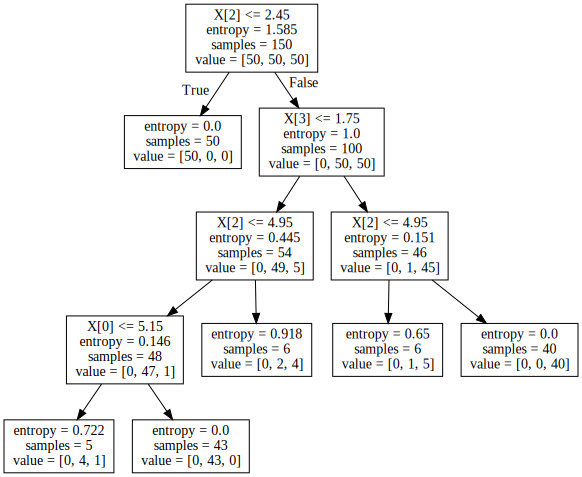

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")
graph

## 2. Generate a picture here

In [ ]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


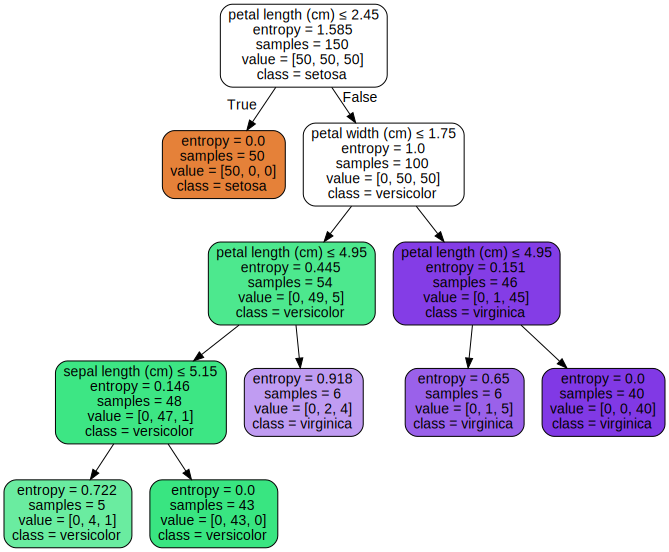

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,  feature_names=iris.feature_names, class_names=iris.target_names,filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
# nodi bianchi massima entropia, arancioni minima, verde e viola se la classe piu probabile è la positiva o negativa

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an "artificial inflation" of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) "modify the weight" of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to "avoid overfitting" (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

# Funzioni comuni

In [ ]:
"""

In base alla classe specificata nel parametro label, la funzione restituisce 
tutte le istanze corrispondenti a quella classe, divise in set di test e di training.
Il parametro dim indica il rapporto di dimensioni tra test set e training set,
es dim=0.7 -> traing set 70% dei dati e test 30%
(tale sottoinsieme sarà quello utilizzato in fase di apprendimento).
In base al valore del parametro inflaction ogni istanza all'interno
del primo viene ripetuta inflaction volte

"""
def get_data(label, dim, inflation): 

    size = len(iris.data) // 3 #Size della singola classe , dove // è la divisione intera
    print("Size is :")
    print(size)
    #np.arange(inizio,fine) divide l'intervallo tra inzio e fine in parti uguali e le ritorna np.arange(3) -> array([0, 1, 2])
    indexes = np.arange(size*label, size*(label+1)) #Indexes of the class to select da start a stop escluso
    print("indexes are:")
    print(indexes)
    #Setto la dimensione del test set come 1-dim e arrotondo con Round alla prima cifra decimale (es round(0.32,1)-->0,3)
    test_size = int((size * round(1.0 - dim, 1))) 
    """
    -np.repeat ripete il primo parametro tante volte quando dice il secondo parametro inflation wes np.repeat(3, 4) -->array([3, 3, 3, 3])
    
    -indexes[:-test_size] -> training set, fatto da gli elementi dall'inizio fino al test_size-esimo contato a partire dalla fine
    quindi se test_size=30 e indexes ha 100 elementi, prendo i primi 70 come training set

    -indexes[-test_size:] -> test set, prendo gli elemti a partire dal  test_size-esimo contato a partire dalla fine fino alla fine dell'array,
     quindi se test_size=30 e indexes ha 100 elementi, prendo gli ultimi 30 come test set
    
    """
    #faccio artificial inflation
    return np.repeat(indexes[:-test_size], inflation), indexes[-test_size:]



#Funzione ausiliari per stampa albero e scores
def printThree(clf,scores):
    print("Scores")
    print(scores)
    print("\n")
    print("Mean of scores")
    print(np.mean(scores, dtype=np.float64))

    #Showing tree
    dot_data = tree.export_graphviz(clf, out_file=None, 
                            feature_names=iris.feature_names, 
                            class_names=iris.target_names, 
                            filled=True, rounded=True,  
                            special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph



# Esercizio 1a : Artificial inflaction

Size is :
50
indexes are:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Size is :
50
indexes are:
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Size is :
50
indexes are:
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
Scores
[0.96666667 1.         0.86666667 0.86666667 1.        ]


Mean of scores
0.9400000000000001


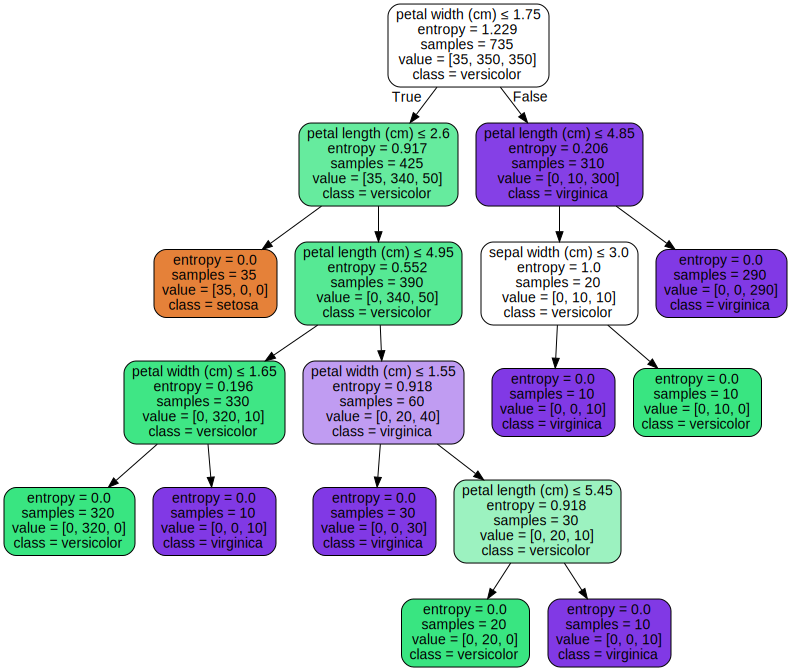

In [ ]:
#Accuratezza aumenta e su alcuni fold arriva al 100%
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

setosa_training, setosa_test = get_data(0, 0.7, 1) # classe 0, 70% training , 1 inflation 
versicolor_training, versicolor_test = get_data(1, 0.7, 10) # classe 1, 70% training , 10 inflation 
virginica_training, virginica_test = get_data(2, 0.7, 10) # classe 2, 70% training , 10 inflation 

#Concateno i 3 training e test set 
indexes_train = np.concatenate([setosa_training, versicolor_training, virginica_training])
indexes_test = np.concatenate([setosa_test, versicolor_test, virginica_test])

iris_X_train = iris.data[indexes_train]
iris_y_train = iris.target[indexes_train]
iris_X_test = iris.data[indexes_test]
iris_y_test = iris.target[indexes_test]

clf = clf.fit(iris_X_train, iris_y_train)

#we pass the classifier, the dataset, the target and the number of partitions 
#we have differents combinations of examples in training and test set
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy of each permutation 
printThree(clf,scores)

# 1b : Modify the weight

Scores
[0.93333333 0.9        0.9        0.93333333 0.93333333]


Mean of scores
0.9200000000000002


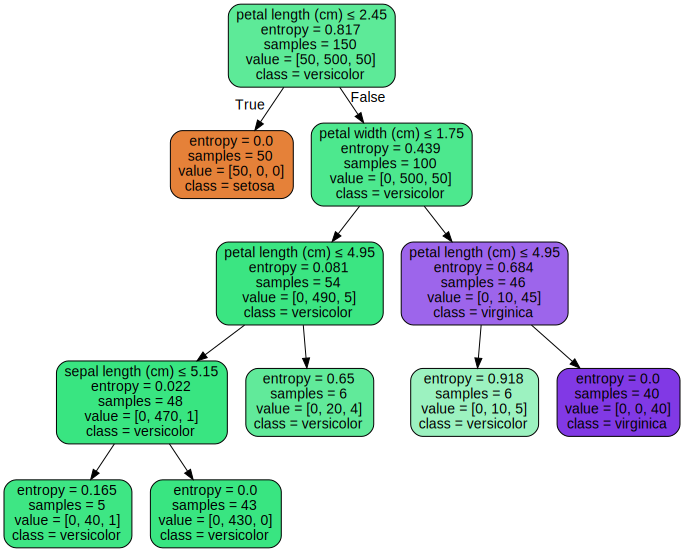

In [ ]:
#versicolor pesa 10 più di  virginica
#Rispetto all inflation fa qualche errore in più e accuracy è più bassa
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf = 5, class_weight={0:1,1:10,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) 
printThree(clf,scores)

Scores
[0.93333333 0.93333333 0.86666667 0.83333333 0.93333333]


Mean of scores
0.9


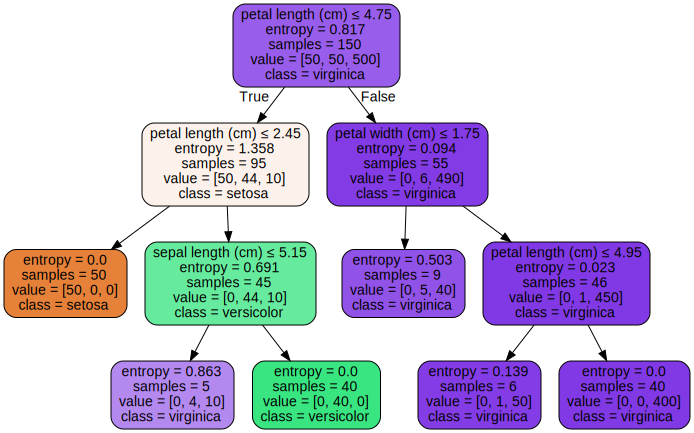

In [ ]:
#virginica pesa 10 più versicolor
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf = 5, class_weight={0:1,1:1,2:10})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
printThree(clf,scores)

# 2 : Avoid Overfitting: fare tuning di max depth, Min samples leaf e min samples split 

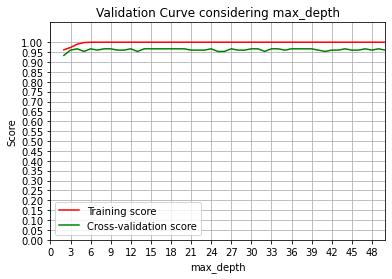

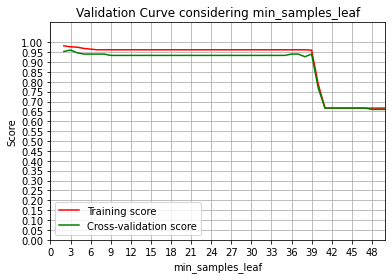

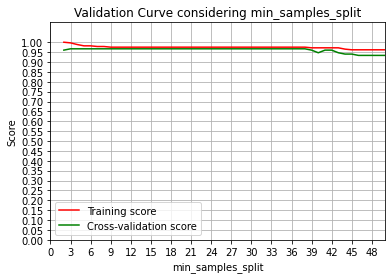

Scores
[0.96666667 1.         0.86666667 0.86666667 1.        ]


Mean of scores
0.9400000000000001


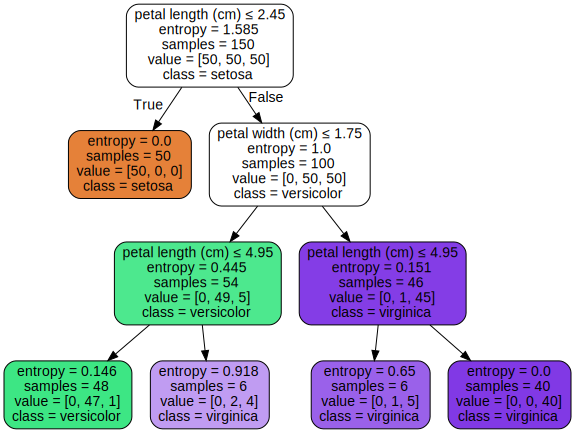

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

  
"""
FUNZIONI AUSILIARIE PER ESERCIZIO 2 AVOID OVERFITTING

"""   
def tuningMaxDepth():
    param_range = np.arange(2, 51) #setto il range di parametri
    #determino i test e training score per i valori di depth nel range
    train_scores, test_scores = validation_curve(
    # Tipo di classificatore, X ossia l'array di features, y ossia l'array di target, nome del parametro variabile, valori per il parametro da valutare param_range
    tree.DecisionTreeClassifier(class_weight = "balanced"), iris.data, iris.target, param_name = "max_depth", param_range = param_range,
        cv = 5, scoring = "accuracy", n_jobs = 1)
    plotTrainAndTestScoreMean(train_scores,test_scores,"max_depth",param_range)


def tuningMinSamplesLeaf():
    param_range = np.arange(2, 51)
    train_scores, test_scores = validation_curve(
    # Tipo di classificatore, X ossia l'array di features, y ossia l'arrai di target, nome del parametro variabile, valori per il parametro da valutare  
    tree.DecisionTreeClassifier(class_weight = "balanced"), iris.data, iris.target, param_name = "min_samples_leaf", param_range = param_range,
        cv = 5, scoring = "accuracy", n_jobs = 1)
    plotTrainAndTestScoreMean(train_scores,test_scores,"min_samples_leaf",param_range)

def tuningMinSamplesSplit():
    param_range = np.arange(2, 51)
    train_scores, test_scores = validation_curve(
    tree.DecisionTreeClassifier(class_weight = "balanced"), iris.data, iris.target, param_name = "min_samples_split", param_range = param_range,
        cv = 5, scoring = "accuracy", n_jobs = 1)   
    plotTrainAndTestScoreMean(train_scores,test_scores,"min_samples_split",param_range)

#Stampa il grafico dati gli score di training, di test l'etichetta da stampare sotto il grafo "param" e il range di valori da plottare        
def plotTrainAndTestScoreMean(train_scores,test_scores,param,param_range):
    #faccio la media perchè degli score training e test perchè sono relativi ai 
    # fold di cross validation io voglio avere una sola linea per ognuno non 5!
    train_scores_mean = np.mean(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis= 1)
    plt.title("Validation Curve considering "+ param)
    plt.xlabel(param)
    plt.grid(True)
    plt.xticks(np.arange(0,51,3))#intervallo x
    plt.yticks(np.arange(0,1.05, 0.05))#intervallo y
    plt.xlim(0, 50)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.plot(param_range, train_scores_mean, label = "Training score", color = "red")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="green")
    plt.legend(loc = "best")
    plt.show()

#Chiamo le 3 funzioni ausiliarie che  fanno tuning degli iperparametri
tuningMaxDepth()
tuningMinSamplesLeaf()
tuningMinSamplesSplit()

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, max_depth=3, min_samples_split=12, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
predicted_y_test = clf.predict(iris_X_test)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
printThree(clf,scores)





#3 Confusion Matrix

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0]
[2 1 0 2 0 2 0 1 2 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 2 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 2 2 0]


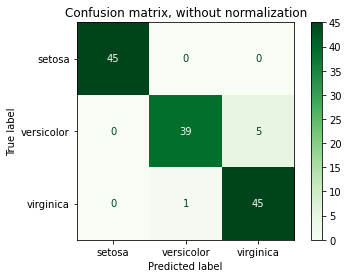

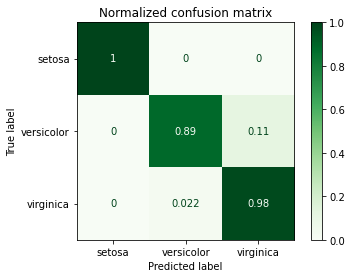

In [ ]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()

#Split dataset and labels in training set and test set, with respectives labels
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.data, iris.target, test_size=0.9, random_state = 0)


clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, max_depth=3, min_samples_split=3, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf.fit(iris_X_train, iris_y_train)
predicted_y_test = clf.predict(iris_X_test)

print(iris_y_test)
print(predicted_y_test)

titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    #cmap= colormap riconosciuta da matplotlib
    """ 
     plot_confusion_matrix richiede il classificatore clf, il set delle istanze, il set delle classi Y, la colour map con colore verde
    """
    disp = plot_confusion_matrix(clf, iris_X_test, iris_y_test, display_labels=iris.target_names,cmap=plt.cm.Greens,normalize=normalize)
    disp.ax_.set_title(title)
plt.show()



# 4 : ROC curves

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


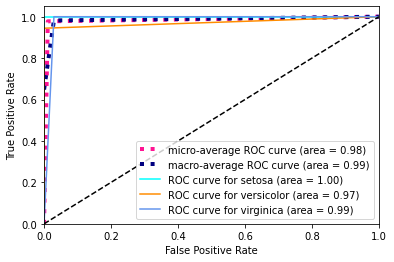

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
#Funzione ausiliaria per fare il plot
def roc_plot(classes, predicted, actual):
    fpr = {} #false positive rate
    tpr = {} #true positive rate
    roc_auc = {} #area under the curve
    print(predicted)
    print(actual)
    for i in range(0, len(classes)): #itero su tutte e 3 le classi di fiori
        # Calcoliamo la ROC curve di tutte e 3 le classi di fiori (classes)
        # actual[:, i] mi permette di selezionare una riga per volta visto che ogni riga corrisponde a una classe 
        # dove : indica da colonna 0 all'ultima colonna e i il n° della riga che vogliamo
        
        
        fpr[i], tpr[i], _ = roc_curve(actual[:, i], predicted[:, i]) #il 3° valore ritornato è una treshold che non serve
        print("FPR [i]")
        print(fpr[i])
        roc_auc[i] = auc(fpr[i], tpr[i]) #calcolo l'area under the curve per classe i-esima
        
    # Aggrego tutti i false positive rate
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))])) #prendo gli elementi unici nella concatenazione dei fps delle classi
    print(fpr)
    print(all_fpr)
    
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)#creo vettore con zeri lungo quanto all_fpr
    for i in range(len(classes)): #per ogni classe
        mean_tpr += interp(all_fpr, fpr[i], tpr[i]) # fa interpolazione (ci si aspetta che i punti siano monotonici crescenti)
    mean_tpr /= len(classes) # divide mean_tpr per il n° di classi

    # Compute micro-average ROC curve and  area under the curve
    #ravel() serve a passare da array multidimensionale ad array

    fpr["micro"], tpr["micro"], _ = roc_curve(actual.ravel(), predicted.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure() #crea una nuova figura
    plt.plot(fpr["micro"],tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),color='deeppink',linestyle=':',linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(len(classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color,label='ROC curve for {0} (area = {1:0.2f})'.format(iris.target_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()


#Split dataset and labels in training set and test set, with respectives labels
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state = 0)

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300,class_weight={0:1,1:1,2:1})
#clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, max_depth=3, min_samples_split=3, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf.fit(iris_X_train, iris_y_train) #build the decision tree

prob = clf.predict_proba(iris_X_test)

actual_prob = np.zeros((iris_y_test.size, 3)) #Return a new matrix with n° of columns iris_y_test.size and n° of rows=3 (one for each class)


for i,y in np.ndenumerate(iris_y_test):#itera su ogni valore della matrice i riga y colonna
    actual_prob[i,y] = 1 #metto tutte le probabolità a 1 (verranno modificate in seguito)
roc_plot(iris.target_names, prob, actual_prob)